In [1]:
#brendon
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
import tabulate
import time 
!pip install annoy
import annoy

2022-12-12 03:38:59.744563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 03:38:59.899738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 03:38:59.899773: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 03:38:59.936248: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-12 03:39:01.970011: W tensorflow/stream_executor/pla

In [2]:
def threed_to_twod(data):
    return data.reshape(data.shape[0], data.shape[1]*data.shape[2])

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [4]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
X_train = threed_to_twod(X_train)
X_test = threed_to_twod(X_test)

In [6]:
print(X_train.shape)
print(X_train.shape)

(60000, 784)
(60000, 784)


Text(0.5, 1.0, 'distribution of testing labels')

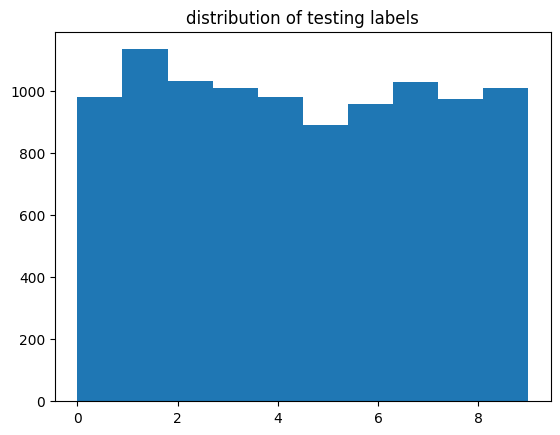

In [7]:
plt.hist(y_test)
plt.title('distribution of testing labels')

Text(0.5, 1.0, 'distribution of training labels')

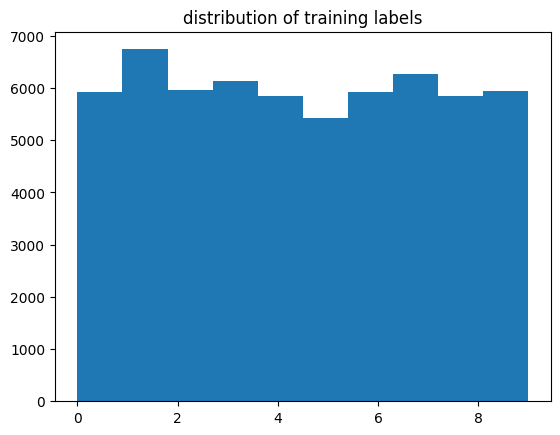

In [8]:
plt.hist(y_train)
plt.title('distribution of training labels')

# KNN 

In [9]:
# ns = [3, 5, 7, 9, 11]
# scores = {}

# for n in ns:
#     knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute'))
#     start_time = time.time()
#     knn.fit(X_train, y_train)

#     scores[knn.score(X_test, y_test)] = n



KeyboardInterrupt: 

In [ ]:
# best_score = max(scores.keys())
# print('best score after tuning: ', best_score)

# best_n = scores[best_score]
# print('best n after tuning: ', best_score)

In [10]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute'))
start_time = time.time()
knn.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:00:00


In [11]:
start_time = time.time()
print(knn.score(X_test, y_test))
elapsed_time = time.time() - start_time
print("Time consumed to test model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

0.9691
Time consumed to test model:  00:04:02


In [12]:
import pickle

filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

# Approximate Nearest Neighbors (ANNOY) #

In [13]:


def test_annoy_knn(Ntrees, Nsamples):
    t1 = time.time()
    
    vector_length = X_train.shape[1]
    t = annoy.AnnoyIndex(vector_length)
    for i, v in zip(range(Nsamples), X_train[:Nsamples]):
        t.add_item(i, v)
    t.build(Ntrees)

    t2 = time.time()
    y_hat = [y_train[t.get_nns_by_vector(v, 5)[0]] for v in X_test]
    t3 = time.time()
    acc = metrics.accuracy_score(y_test, y_hat)
    conf = metrics.confusion_matrix(y_test, y_hat)
    return (Nsamples, acc, t2-t1, t3-t2, conf)


ann_results = [test_annoy_knn(nt, N) for nt in [1,10] for N in [20000, 40000, 80000, 1000000]]


ann_table = [x[:-1] for x in ann_results]
display(HTML(tabulate.tabulate(ann_table[:4], ["Nsamples", "Accuracy", "Training time", "Test time"], tablefmt='html')))
display(HTML(tabulate.tabulate(ann_table[4:], ["Nsamples", "Accuracy", "Training time", "Test time"], tablefmt='html')))

/tmp/ipykernel_505/523396369.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
/tmp/ipykernel_505/523396369.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
/tmp/ipykernel_505/523396369.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
/tmp/ipykernel_505/523396369.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
/tmp/ipykernel_505/523396369.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.A

Nsamples,Accuracy,Training time,Test time
20000,0.9383,2.0622,2.74151
40000,0.943,3.97017,2.92719
80000,0.9469,5.79573,3.02274
1000000,0.9469,5.91421,3.19008


Nsamples,Accuracy,Training time,Test time
20000,0.9544,2.53057,2.82755
40000,0.9585,5.28122,3.18514
80000,0.9631,7.9042,3.22793
1000000,0.9631,7.77963,3.41387


In [14]:
def annoy_knn(Ntrees, Nsamples, neighbors, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    vector_length = X_train.shape[1]
    t = annoy.AnnoyIndex(vector_length)
    for i, v in zip(range(Nsamples), X_train[:Nsamples]):
        t.add_item(i, v)
    t.build(Ntrees)

    elapsed_time = time.time() - start_time
    print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    start_time = time.time()
    pred = [y_train[t.get_nns_by_vector(v, neighbors)[0]] for v in X_test]
    elapsed_time = time.time() - start_time
    print("Time consumed to test model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    acc = metrics.accuracy_score(y_test, pred)
    return acc, pred


acc, pred = annoy_knn(10, 80000, 5, X_train, y_train, X_test, y_test)

print('accuracy of ann: ', acc)

metrics.confusion_matrix(y_test, pred)

/tmp/ipykernel_505/1919170951.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
Time consumed to fit model:  00:00:08
Time consumed to test model:  00:00:03
accuracy of ann:  0.9631


array([[ 973,    0,    2,    0,    0,    0,    2,    1,    2,    0],
       [   0, 1126,    2,    1,    0,    2,    3,    0,    1,    0],
       [  11,    4,  982,    6,    0,    0,    5,   13,   10,    1],
       [   1,    1,    3,  975,    0,   11,    1,    7,   10,    1],
       [   2,    9,    2,    0,  925,    0,    6,    5,    1,   32],
       [   4,    0,    1,   18,    1,  841,    9,    3,    9,    6],
       [   8,    2,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   16,    5,    1,    6,    0,    0,  988,    0,   12],
       [   3,    2,    3,   18,    4,    9,    5,    8,  914,    8],
       [   8,    5,    2,    2,   11,    3,    1,   10,    3,  964]])

In [15]:
ns = [3, 5, 7, 9, 11]
scores = {}

for n in ns:
    acc, pred = annoy_knn(10, 80000, n, X_train, y_train, X_test, y_test)
    
    scores[acc] = n

/tmp/ipykernel_505/1919170951.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
Time consumed to fit model:  00:00:07
Time consumed to test model:  00:00:03
/tmp/ipykernel_505/1919170951.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
Time consumed to fit model:  00:00:07
Time consumed to test model:  00:00:03
/tmp/ipykernel_505/1919170951.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)
Time consumed to fit model:  00:00:07
Time consumed to test model:  00:00:03
/tmp/ipykernel_505/1919170951.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angu

In [16]:
best_score = max(scores.keys())
print('best score after tuning: ', best_score)

best_n = scores[best_score]
print('best n after tuning: ', scores[best_score])

best score after tuning:  0.9631
best n after tuning:  11


In [17]:
class annoy_clf:
    def __init__(self, Ntrees, Nsamples, neighbors):
        self.Ntrees = Ntrees
        self.Nsamples = Nsamples
        self.neighbors = neighbors
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        vector_length = X_train.shape[1]
        t = annoy.AnnoyIndex(vector_length)
        for i, v in zip(range(self.Nsamples), X_train[:self.Nsamples]):
            t.add_item(i, v)
        t.build(self.Ntrees)

        self.t = t        

    def predict(self, feats):
        return [self.y_train[self.t.get_nns_by_vector(v, self.neighbors)[0]] for v in feats]

    
    def score(self, labels, predicted):
        return metrics.accuracy_score(labels, predicted)
    

In [18]:
ann = annoy_clf(10, 80000, 5)

ann.fit(X_train, y_train)
ann_test_pred = ann.predict(X_test)
ann.score(y_test, ann_test_pred)

/tmp/ipykernel_505/1169755954.py:12: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = annoy.AnnoyIndex(vector_length)


0.9631

In [19]:
import dill

filename = 'ann.sav'
dill.dump(ann, open(filename, 'wb'))

TypeError: cannot pickle 'annoy.Annoy' object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62bfbc7a-56e8-416a-a6e5-2c8f44c699f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>